In [1]:
import hddm
import os
import sys
import copy
import seaborn as sns
import pandas as pd
import glob
import matplotlib.pyplot as plt
from kabuki.analyze import gelman_rubin
from kabuki.analyze import check_geweke
import kabuki
print (os.environ['CONDA_DEFAULT_ENV'])
%matplotlib inline

hddm92


In [2]:
#sys.path
hddm.__version__ 

'0.9.5'

In [5]:
nchains = 5
chains = []
for i in range(nchains):
    chain = hddm.load('./test_block_a_v_t_thin_center_chain_' + str(i))
    chains.append(chain)
    print(i)

0
1
2
3
4


In [6]:
gelman_rubin(chains)

{'v_Intercept': 0.9999587933640813,
 'v_Intercept_std': 1.0000625165001247,
 'v_Intercept_subj.0': 1.000180261760479,
 'v_Intercept_subj.1': 1.0003249155444374,
 'v_Intercept_subj.2': 0.9999621721334141,
 'v_Intercept_subj.3': 1.000197871036745,
 'v_Intercept_subj.4': 1.0003939892438323,
 'v_Intercept_subj.5': 1.000189991685425,
 'v_Intercept_subj.6': 1.0000432631136462,
 'v_Intercept_subj.7': 1.000266745031615,
 'v_Intercept_subj.8': 0.9998735103122054,
 'v_Intercept_subj.9': 1.0001257153678162,
 'v_Intercept_subj.10': 0.9999680883440923,
 'v_Intercept_subj.11': 0.9999913576819467,
 'v_Intercept_subj.12': 0.9998899591782913,
 'v_Intercept_subj.13': 0.9998067699481571,
 'v_Intercept_subj.14': 0.9999883552195341,
 'v_Intercept_subj.16': 0.9999777857060852,
 'v_Intercept_subj.17': 0.9999184218000229,
 'v_Intercept_subj.18': 0.9998384998355229,
 'v_Intercept_subj.19': 0.9998940656083608,
 'v_Intercept_subj.20': 1.0001200271194424,
 'v_Intercept_subj.21': 0.9999841597817446,
 'v_Intercept_

In [7]:
combined_model = kabuki.utils.concat_models(chains)


Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting v_C(miniblock_type, Treatment("noncompete"))[T.rewarded]
Plotting v_coherence_center
Plotting a_Intercept
Plotting a_Intercept_std
Plotting a_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting a_C(miniblock_type, Treatment("noncompete"))[T.rewarded]
Plotting t_Intercept
Plotting t_Intercept_std
Plotting t_C(miniblock_type, Treatment("noncompete"))[T.compete]
Plotting t_C(miniblock_type, Treatment("noncompete"))[T.rewarded]


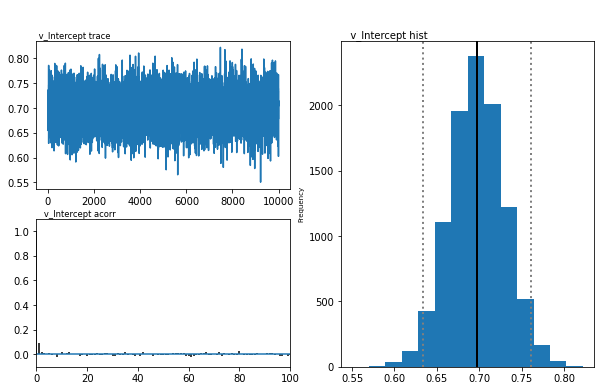

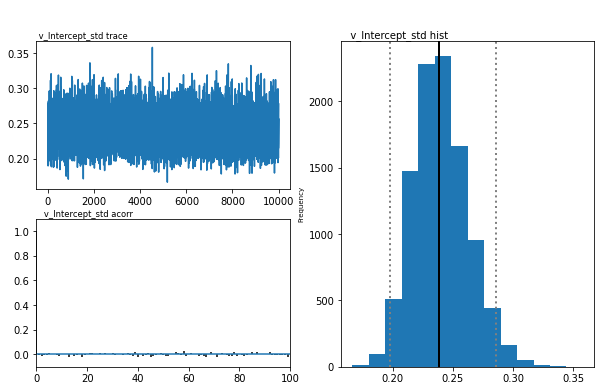

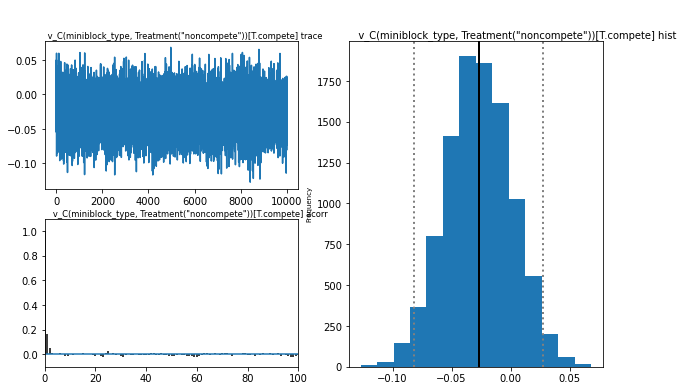

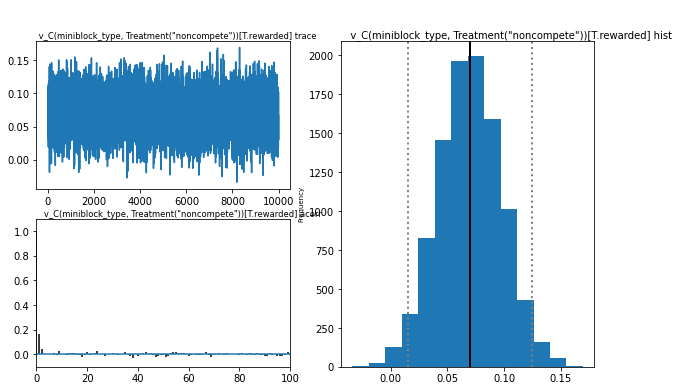

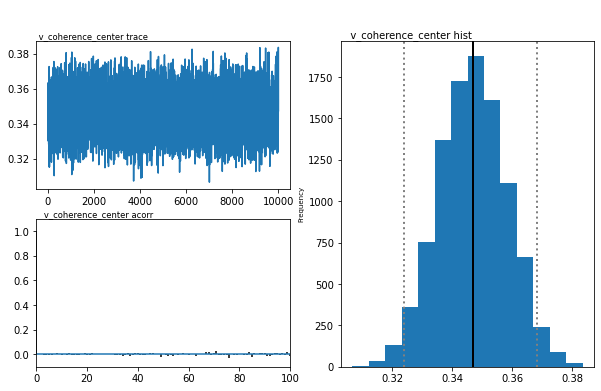

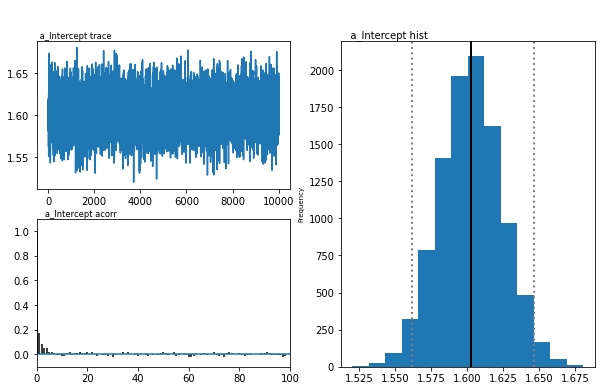

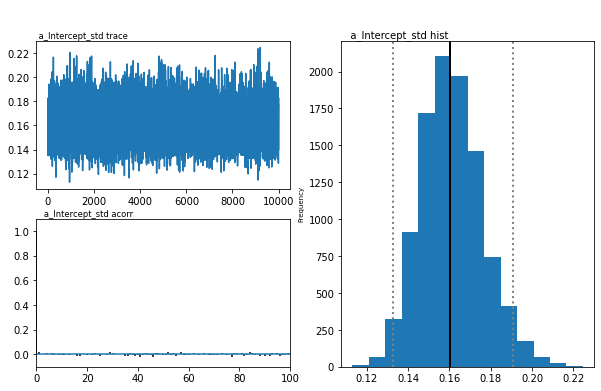

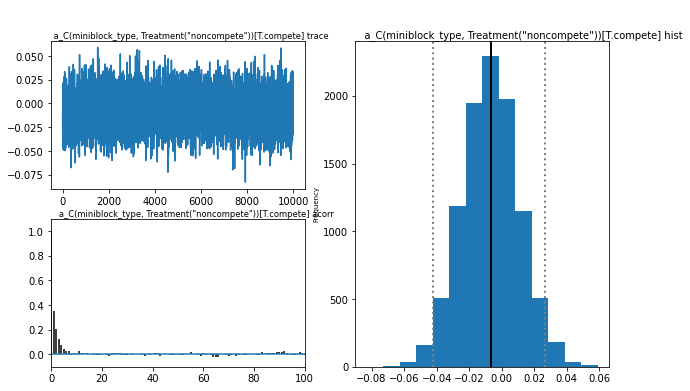

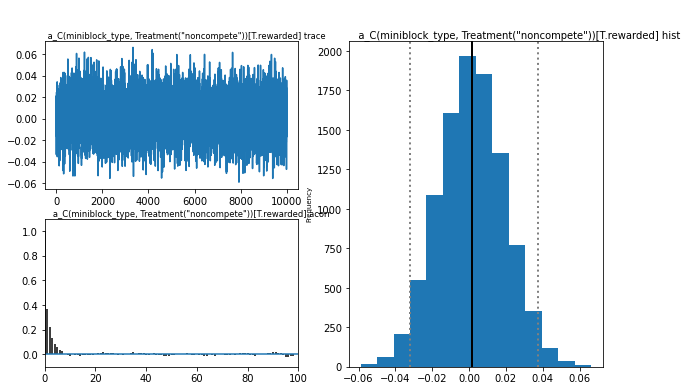

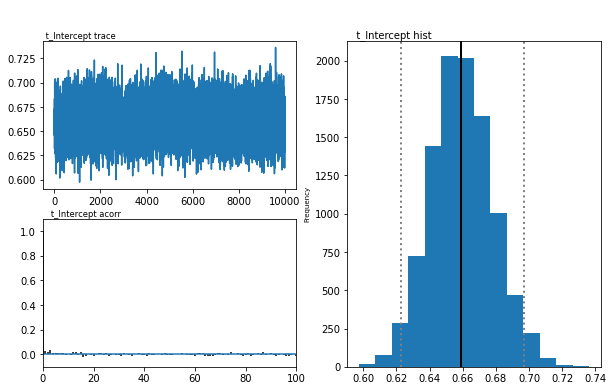

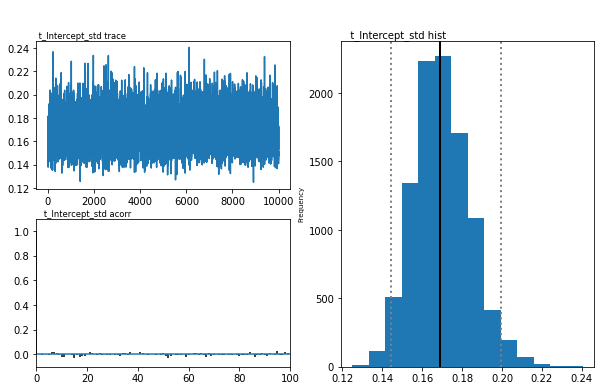

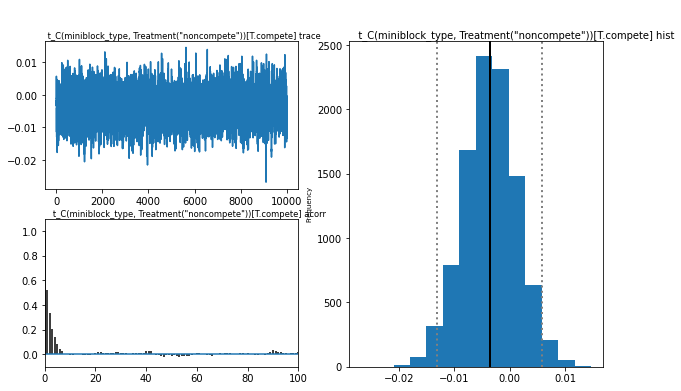

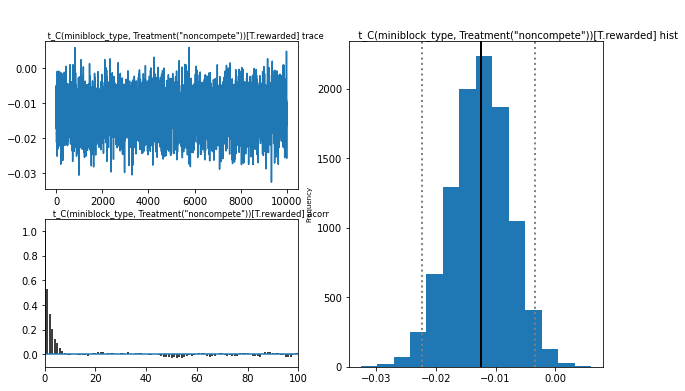

In [8]:
combined_model.plot_posteriors()

In [9]:
check_geweke(combined_model, assert_=False)

Chain of knode_name          v_Intercept
stochastic                 True
observed                  False
subj                      False
node                v_Intercept
tag                          ()
depends                      []
hidden                    False
index                       NaN
sub                         NaN
miniblock                   NaN
rt                          NaN
rule                        NaN
miniblock_type              NaN
response                    NaN
cond                        NaN
coherence                   NaN
rewarded_rule               NaN
coherence_bin               NaN
subj_idx                    NaN
coherence_float             NaN
rt_flip                     NaN
coherence_center            NaN
mean                    0.69723
std                   0.0324942
2.5q                   0.633693
25q                    0.675762
50q                    0.696872
75q                    0.718714
97.5q                  0.761713
mc err               0.00038529

False

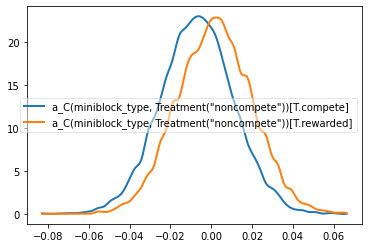

In [11]:
intercept, a_compete, a_rewarded = combined_model.nodes_db.node.loc[['a_Intercept', 
                                                                           'a_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           'a_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([a_compete, a_rewarded])

In [12]:
len(a_compete.trace.gettrace())

10000

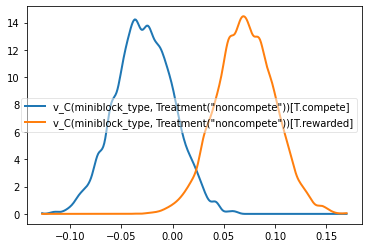

In [13]:
intercept, v_compete, v_rewarded = combined_model.nodes_db.node.loc[['v_Intercept', 
                                                                       'v_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           'v_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([v_compete, v_rewarded])

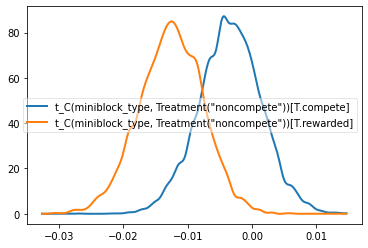

In [14]:
intercept, t_compete, t_rewarded = combined_model.nodes_db.node.loc[['t_Intercept', 
                                                                           't_C(miniblock_type, Treatment("noncompete"))[T.compete]',
                                                                           't_C(miniblock_type, Treatment("noncompete"))[T.rewarded]']]

hddm.analyze.plot_posterior_nodes([t_compete, t_rewarded])

In [15]:
print("v_rewarded = ", (v_rewarded.trace() > 0).mean())
print("v_rewarded versus compete = ", (v_rewarded.trace() > v_compete.trace()).mean())
print("v_compete = ", (v_compete.trace() < 0).mean())
print('\n')


print("a_rewarded = ", (a_rewarded.trace() > 0).mean())
print("a_rewarded versus compete = ", (a_rewarded.trace() > a_compete.trace()).mean())


print("a_compete = ", (a_compete.trace() > 0).mean())
print('\n')


print("t_rewarded = ", (t_rewarded.trace() < 0).mean())
print("t_rewarded versus compete = ", (t_rewarded.trace() < t_compete.trace()).mean())
print("t_compete = ", (t_compete.trace() < 0).mean())

v_rewarded =  0.994
v_rewarded versus compete =  0.9996
v_compete =  0.8298


a_rewarded =  0.5337
a_rewarded versus compete =  0.6782
a_compete =  0.3447


t_rewarded =  0.9957
t_rewarded versus compete =  0.979
t_compete =  0.7746


In [26]:
print("v_rewarded = ", (v_rewarded.trace() > 0).mean())
print("v_rewarded versus compete = ", (v_rewarded.trace() > v_compete.trace()).mean())
print("v_compete = ", (v_compete.trace() < 0).mean())
print('\n')


print("a_rewarded = ", (a_rewarded.trace() > 0).mean())
print("a_rewarded versus compete = ", (a_rewarded.trace() > a_compete.trace()).mean())


print("a_compete = ", (a_compete.trace() > 0).mean())
print('\n')


print("t_rewarded = ", (t_rewarded.trace() < 0).mean())
print("t_rewarded versus compete = ", (t_rewarded.trace() < t_compete.trace()).mean())
print("t_compete = ", (t_compete.trace() < 0).mean())

v_rewarded =  0.9956
v_rewarded versus compete =  0.9995
v_compete =  0.8323


a_rewarded =  0.5369
a_rewarded versus compete =  0.6795
a_compete =  0.3437


t_rewarded =  0.996
t_rewarded versus compete =  0.9816
t_compete =  0.7519


In [14]:
df = pd.DataFrame({'v_rewarded':v_rewarded.trace(),
                  'v_compete' : v_compete.trace(),
                  'a_rewarded' : a_rewarded.trace(),
                  'a_compete' : a_compete.trace(),
                  't_rewarded' : t_rewarded.trace(),
                  't_compete' : t_compete.trace()})
df.to_csv('/home/despo/rule_habit/simulated_data/traces_test.csv',
         index = False)

In [16]:
(v_rewarded.trace() > v_compete.trace()).mean()

0.9995

In [17]:
(v_compete.trace() < 0).mean()

0.8323

In [18]:
(v_rewarded.trace() > 0).mean()

0.9956

In [22]:
(t_rewarded.trace() > 0).mean()

0.004

In [16]:
combined_model.dic

27600.106553347545

In [20]:
res = hddm.utils.post_pred_gen(combined_model, groupby = ['subj_idx'], append_data = True)

 [-----------------101%-----------------] 86 of 85 complete in 949.1 sec

In [21]:
# flip error reaction times to be positive again
res['accuracy_sampled'] = [int(x) for x in res['rt_sampled'] > 0]
res['rt_positive_sampled'] = [rt*(int(rt>0)*2-1) for rt, r in list(zip(res['rt_sampled'], res['response']))]
res['rt_positive'] = [rt*(int(rt>0)*2-1) for rt, r in list(zip(res['rt'], res['response']))]


In [23]:
fig_df = res.reset_index().groupby(['sub', 'coherence_bin', 'miniblock_type','cond','level_2']).mean().reset_index()

In [27]:
fig_df.to_csv('/home/despo/rule_habit/simulated_data/avt_test.csv')

In [43]:
fig_df.mean()

coherence_bin              1.502944
level_2                   93.722222
sample                   249.500000
rt_sampled                 0.602348
response_sampled           0.741962
level_0                32900.511524
index                  32900.511524
rt                         0.511997
response                   0.722974
coherence                  0.413827
subj_idx                  42.737379
coherence_float            1.502944
rt_flip                    0.511997
accuracy_sampled           0.741962
rt_positive_sampled        1.251242
rt_positive                1.199748
dtype: float64

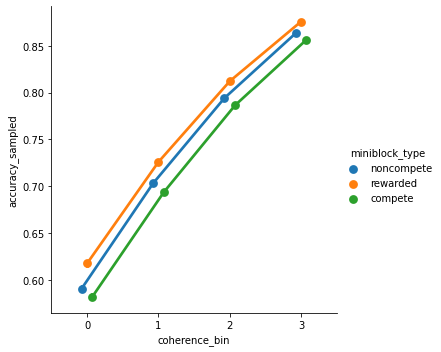

In [24]:
sns.catplot(data=fig_df,
        x="coherence_bin",
        y="accuracy_sampled",
        hue = "miniblock_type",
        kind = "point",
                hue_order = ['noncompete','rewarded','compete'],
        dodge = .15,
        ci = 68)

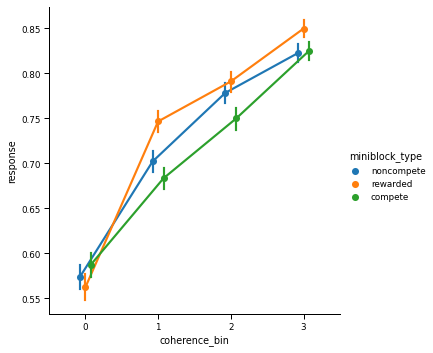

In [33]:
sns.set_context('paper')
sns.catplot(
        x="coherence_bin",
           y="response",
           hue = "miniblock_type",
            kind = 'point',
    hue_order = ['noncompete','rewarded','compete'],
            dodge = .15,
    ci = 68,
           data=fig_df)

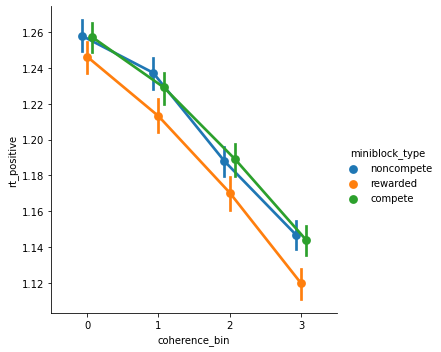

In [33]:
sns.catplot(data=fig_df,
        x="coherence_bin",
        y="rt_positive",
        hue = "miniblock_type",
                hue_order = ['noncompete','rewarded','compete'],
        kind = "point",
        dodge = .15,
        ci = 68)

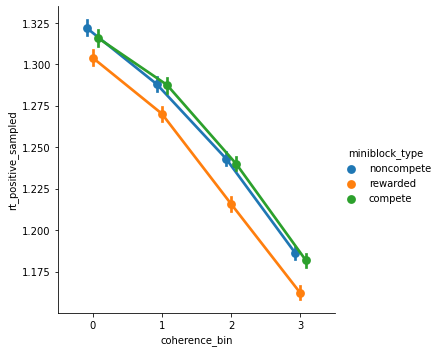

In [36]:
sns.catplot(data=fig_df,
        x="coherence_bin",
        y="rt_positive_sampled",
        hue = "miniblock_type",
                hue_order = ['noncompete','rewarded','compete'],

        kind = "point",
        dodge = .15,
        ci = 68)

In [39]:
sample0 = res.reset_index()
sample0 = sample0[sample0['sample'] ==22]

(-2.0, 2.0)

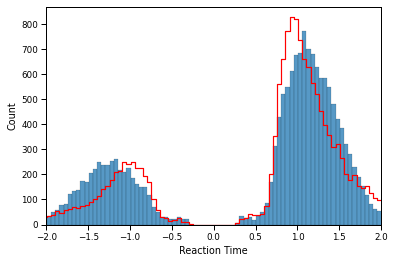

In [40]:
a = sample0.copy()
a['Reaction Time'] = a['rt']
a['label'] = 'empirical'
b = sample0.copy()
b['Reaction Time'] = b['rt_sampled']
b['label'] = 'simulated'
fig = pd.concat([a,b])[['Reaction Time','label','sub']].reset_index()


ax = sns.histplot(x = 'Reaction Time',
            color = 'red',
                  element = 'step',
#                   alpha = 0,
                  common_bins =True,
#                   kde = True,
                  binwidth = .05,
                  pmax = 1,
            fill = False,
            data = b)
sns.histplot(x = 'Reaction Time',
                               common_bins =True,
                               binwidth = .05,
             ax = ax,
            data = a)
plt.xlim([-2,2])

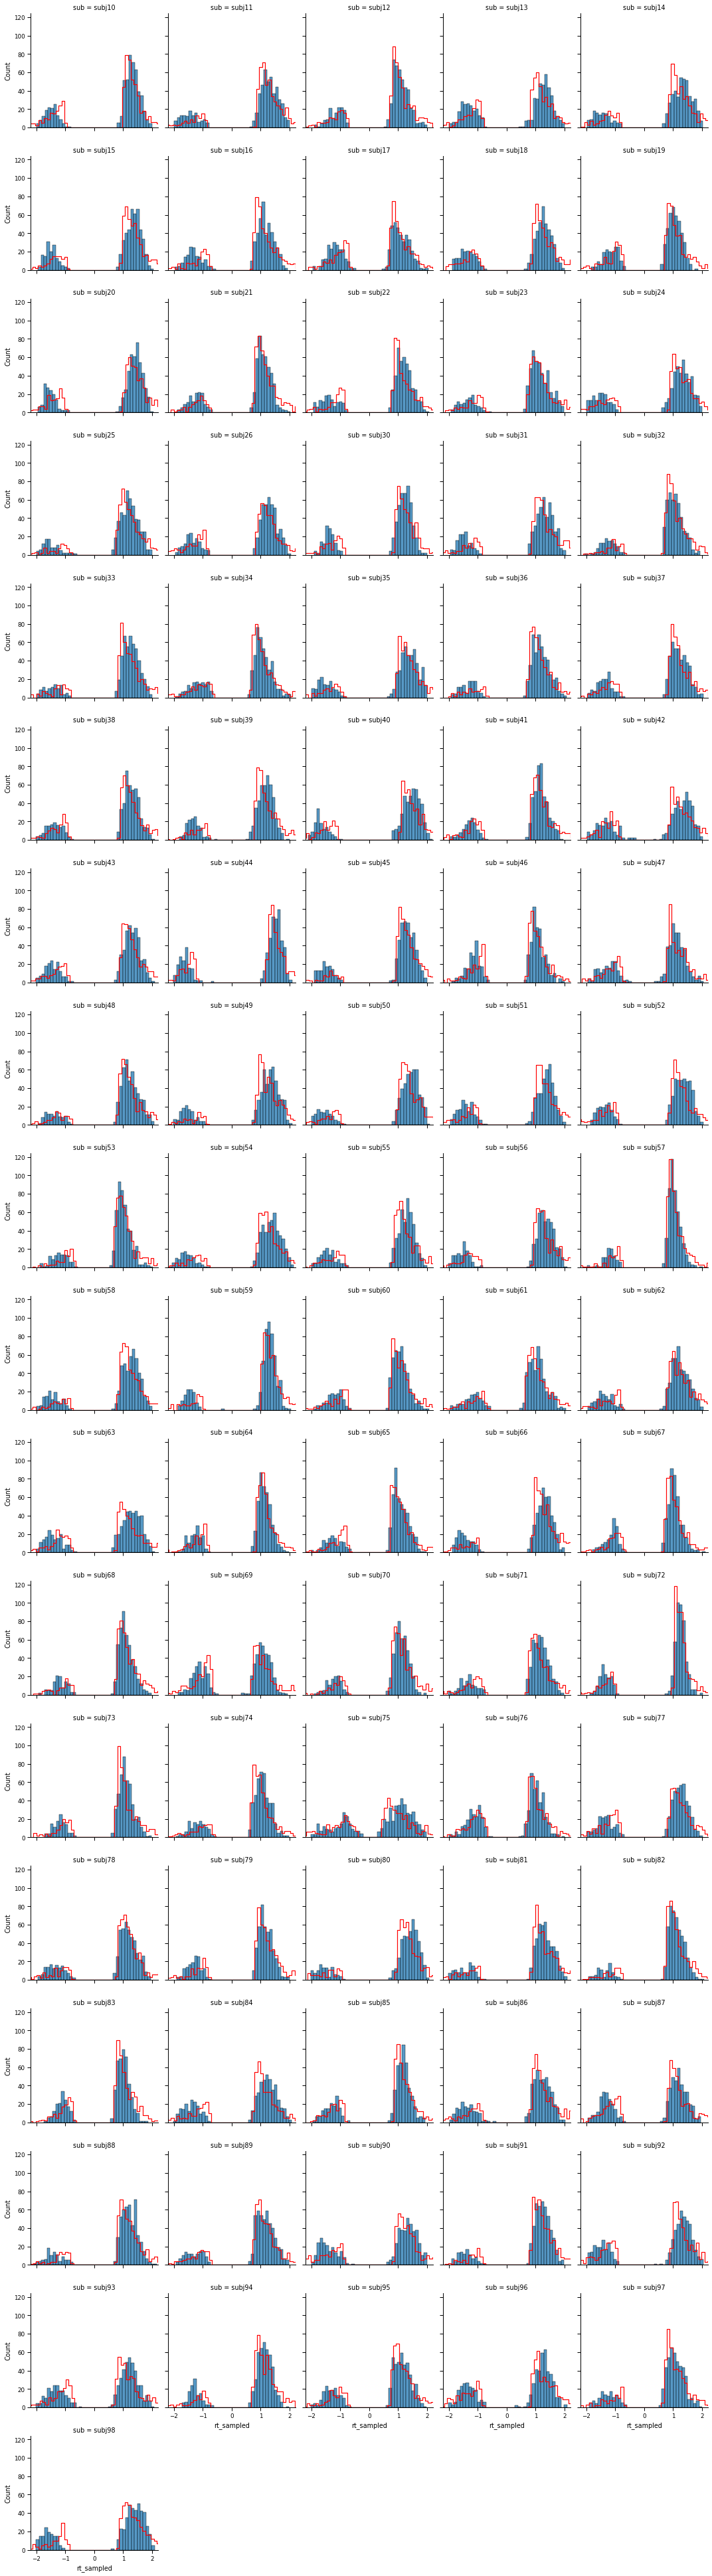

In [159]:
g = sns.FacetGrid(b,
                  col = 'sub',
                  sharex = True,
                  xlim = (-2.2,2.2),
                  col_wrap = 5)
g.map(sns.histplot, 
          'rt', 
           binwidth = .1,
          common_bins = True)
g.map(sns.histplot, 'rt_sampled', 
              color = 'red',
                  element = 'step',
                              binwidth = .1,
                        common_bins = True,
            fill = False)